In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_excel('Project1_dataset.xlsx')
df['Период'] = pd.to_datetime(df['Период'], format = '%Y%m') #convert to datetime
df.head()

,Период,Доходы_1,Доходы_2
0,2019-01-01,9334750.309,3.954998e+06
1,2019-02-01,9285036.374,3.917801e+06
2,2019-03-01,9221571.473,3.858750e+06
3,2019-04-01,9223271.382,3.843909e+06
4,2019-05-01,9211187.625,3.817744e+06


Датафрейм содержит в себе временную и таргетную колонку, что значит это time series analysis. 

In [3]:
df1 = df[['Период','Доходы_1']]
df2 = df[['Период', 'Доходы_2']]
print(df1.head())
print('\n',df2.head())
#divinding into 2 datasets because we have 2 target features

      Период     Доходы_1
0 2019-01-01  9334750.309
1 2019-02-01  9285036.374
2 2019-03-01  9221571.473
3 2019-04-01  9223271.382
4 2019-05-01  9211187.625

       Период      Доходы_2
0 2019-01-01  3.954998e+06
1 2019-02-01  3.917801e+06
2 2019-03-01  3.858750e+06
3 2019-04-01  3.843909e+06
4 2019-05-01  3.817744e+06


In [4]:
df1.set_index('Период')
df2.set_index('Период')
#set index of df to Period column

,Доходы_2
Период,
2019-01-01,3.954998e+06
2019-02-01,3.917801e+06
2019-03-01,3.858750e+06
2019-04-01,3.843909e+06
2019-05-01,3.817744e+06
2019-06-01,3.784239e+06
2019-07-01,3.761693e+06
2019-08-01,3.722387e+06
2019-09-01,3.701241e+06


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Период', ylabel='Доходы_1'>

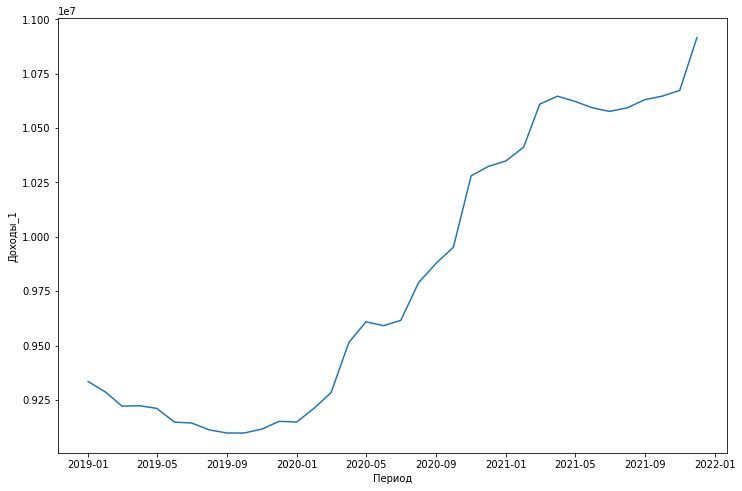

In [6]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df1, x = 'Период', y = 'Доходы_1')

<AxesSubplot:xlabel='Период', ylabel='Доходы_2'>

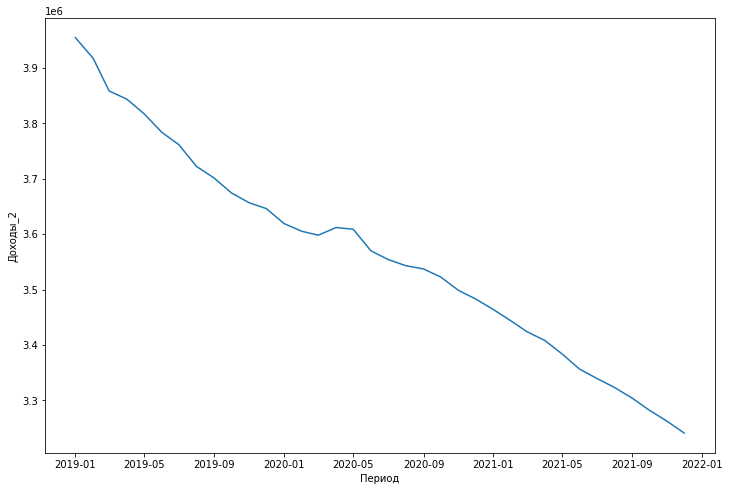

In [7]:
plt.figure(figsize = (12, 8))
sns.lineplot(data = df2, x = 'Период', y = 'Доходы_2')

Дальше для построения модели и предугадывания значений я буду использовать arima.

In [8]:
from pmdarima import auto_arima

In [9]:
stepwise_fit = auto_arima(df1['Доходы_1'], trace = True, suppress_warnings = True)
stepwise_fit.summary()
#смотрим summary, чтоб узнать какой порядок модели самый подходящий для нас

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=900.796, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=902.700, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=901.779, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=906.884, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=902.948, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.355 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -448.398
Date:                Thu, 30 Mar 2023   AIC                            900.796
Time:                        22:23:53   BIC                            903.906
Sample:                             0   HQIC                           901.869
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.516e+04   2.33e+04      1.936      0.053    -549.914    9.09e+04
sigma2      7.858e+09   2.11e+09      3.716      0.000    3.71e+09     1.2e+10
===================================================================================
Ljung-Box (L1) (Q):                   2.91   Jarque-Bera (JB):                17.93
Prob(Q):                              0.09   Prob(JB):                         0.00
Heteroskedasticity (H):               1.44   Skew:                             1.50
Prob(H) (two-sided):                  0.53   Kurtosis:                         4.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
stepwise_fit2 = auto_arima(df2['Доходы_2'], trace = True, suppress_warnings = True)
stepwise_fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=761.315, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770.236, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=764.633, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=806.509, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=760.327, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=753.326, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=752.510, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=770.505, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=753.470, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=834.596, Time=0.02 sec

Best model:  ARIMA(2,1,0)(0,0,0)[0] intercept
Total fit time: 0.935 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   36
Model:               SARIMAX(2, 1, 0)   Log Likelihood                -372.255
Date:                Thu, 30 Mar 2023   AIC                            752.510
Time:                        22:23:54   BIC                            758.732
Sample:                             0   HQIC                           754.658
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.612e+04   1751.622     -9.203      0.000   -1.96e+04   -1.27e+04
ar.L1         -0.0053      0.033     -0.161      0.872      -0.070       0.059
ar.L2         -0.0109      0.039     -0.278      0.781      -0.088       0.066
sigma2      9.464e+07      0.014   6.77e+09      0.000    9.46e+07    9.46e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.23   Jarque-Bera (JB):                11.03
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.27   Skew:                             0.64
Prob(H) (two-sided):                  0.03   Kurtosis:                         5.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.13e+28. Standard errors may be unstable.
"""

In [11]:
import statsmodels.api as sm

In [12]:
model1 = sm.tsa.arima.ARIMA(df1['Доходы_1'], order = (1,2,1)) #строим модель
model2 = sm.tsa.arima.ARIMA(df2['Доходы_2'], order = (2,1,1))
model_fit1 = model1.fit()
model_fit2 = model2.fit()
# print(model1.summary())
# print(model2.summary())

c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [13]:
pred1 = model_fit1.predict(end = (len(df1) - 1) + 6) #ну тут все понятно
pred2 = model_fit2.predict(end = (len(df2) - 1) + 6)
# print(pred1)
# print(pred2)

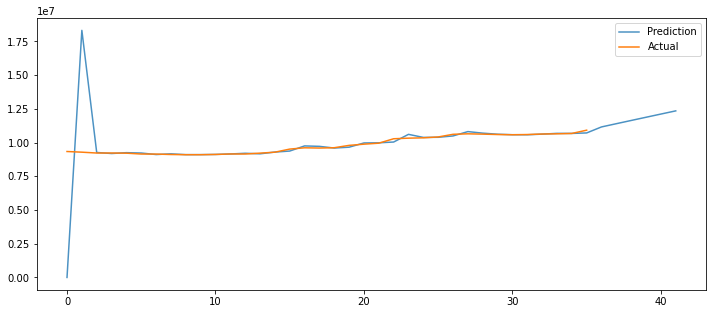

In [14]:
plt.figure(figsize = (12, 5))
plt.plot(pred1, label = 'Prediction', alpha = 0.8)
plt.plot(df1['Доходы_1'], label = 'Actual')
plt.legend() 

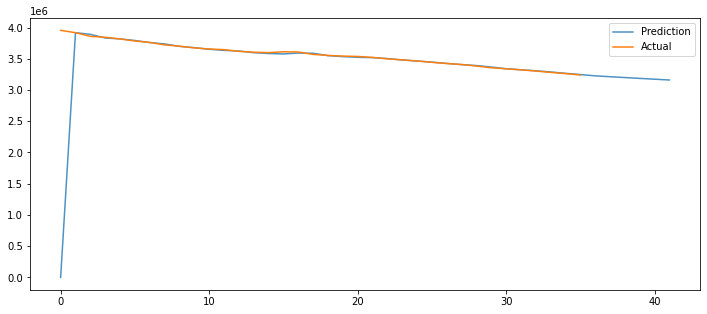

In [15]:
plt.figure(figsize = (12, 5))
plt.plot(pred2, label = 'Prediction', alpha = 0.8)
plt.plot(df2['Доходы_2'], label = 'Actual')
plt.legend()

In [16]:
import datetime
from dateutil.relativedelta import relativedelta
start = datetime.datetime.strptime("2022-01", "%Y-%m")
date_list = [start + relativedelta(months=x) for x in range(0,6)]

In [17]:
last_six1 = pred1[-6:]
last_six2 = pred2[-6:]
last_six12 = last_six1+last_six2

In [18]:
data = {'Период' : date_list, 'Доходы_1_pred' : last_six1, 'Доходы_2_pred' : last_six2, 'Общий_доход_pred' : last_six12}

In [19]:
y = pd.DataFrame(data)
y

,Период,Доходы_1_pred,Доходы_2_pred,Общий_доход_pred
36,2022-01-01,1.115636e+07,3.226852e+06,1.438321e+07
37,2022-02-01,1.139636e+07,3.213068e+06,1.460943e+07
38,2022-03-01,1.163531e+07,3.199538e+06,1.483485e+07
39,2022-04-01,1.187329e+07,3.186256e+06,1.505954e+07
40,2022-05-01,1.211037e+07,3.173219e+06,1.528358e+07
41,2022-06-01,1.234662e+07,3.160421e+06,1.550704e+07


In [20]:
y.to_csv('submit_project_1_Akhymbek_Ali')